In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime
pd.set_option('display.max_columns', None)
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('D:\\Data_sets\\movie\\train.csv')
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [3]:
test=pd.read_csv('D:\\Data_sets\\movie\\test.csv')
test.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."


In [4]:
test.shape

(4398, 22)

In [5]:
pd.set_option('display.max_columns', None)
train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [6]:
train.shape

(3000, 23)

In [7]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [8]:
train.isnull().sum()*100/train.shape[0]

id                        0.000000
belongs_to_collection    79.866667
budget                    0.000000
genres                    0.233333
homepage                 68.466667
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.266667
popularity                0.000000
poster_path               0.033333
production_companies      5.200000
production_countries      1.833333
release_date              0.000000
runtime                   0.066667
spoken_languages          0.666667
status                    0.000000
tagline                  19.900000
title                     0.000000
Keywords                  9.200000
cast                      0.433333
crew                      0.533333
revenue                   0.000000
dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [10]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [11]:
## id

In [12]:
train.drop('id', axis=1, inplace=True)

In [13]:
test.drop('id', axis=1, inplace=True)

In [14]:
### belongs_to_collection

In [15]:
train.drop(['belongs_to_collection'], axis=1, inplace=True)

In [16]:
test.drop(['belongs_to_collection'], axis=1, inplace=True)

In [17]:
train.isnull().sum()

budget                     0
genres                     7
homepage                2054
imdb_id                    0
original_language          0
original_title             0
overview                   8
popularity                 0
poster_path                1
production_companies     156
production_countries      55
release_date               0
runtime                    2
spoken_languages          20
status                     0
tagline                  597
title                      0
Keywords                 276
cast                      13
crew                      16
revenue                    0
dtype: int64

In [18]:
train.head()

,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [19]:
### budget

In [20]:
train.budget.value_counts()

0           812
15000000     72
25000000     71
40000000     71
20000000     68
           ... 
6000          1
16400000      1
1243000       1
2             1
24554         1
Name: budget, Length: 406, dtype: int64

In [21]:
train.budget.corr(train.revenue)

0.7529645103815287

<AxesSubplot:xlabel='budget', ylabel='revenue'>

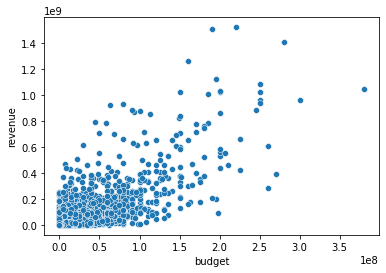

In [22]:
sns.scatterplot(x=train.budget,y=train.revenue)

In [23]:
## genres

In [24]:
train[['genres']]

,genres
0,"[{'id': 35, 'name': 'Comedy'}]"
1,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,"[{'id': 18, 'name': 'Drama'}]"
3,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
...,...
2995,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
2996,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
2997,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
2998,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."


In [25]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [26]:
genre=[]

for i in train.genres:
    d=get_dict(i)
    if d != {}:
        genre.append(d[0]['name'])
    else:
        genre.append(np.NaN)
    

In [27]:
train['genre']=genre

In [28]:
train.drop('genres', axis=1, inplace=True)

In [29]:
genre=[]

for i in test.genres:
    d=get_dict(i)
    if d != {}:
        genre.append(d[0]['name'])
    else:
        genre.append(np.NaN)

In [30]:
test['genre']=genre

In [31]:
test.drop('genres', axis=1, inplace=True)

In [32]:
train.head(2)

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre
0,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy
1,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy


In [33]:
train.genre.value_counts()

Drama              785
Comedy             604
Action             520
Adventure          187
Horror             170
Crime              147
Thriller           116
Animation           76
Documentary         71
Fantasy             68
Romance             67
Science Fiction     41
Family              36
Mystery             33
Music               20
War                 20
History             16
Western             13
Foreign              2
TV Movie             1
Name: genre, dtype: int64

In [34]:
train.genre.isnull().sum()

7

In [35]:
train.genre.mode()[0]

'Drama'

In [36]:
train.genre=train.genre.fillna(train.genre.mode()[0])

In [37]:
test.genre=test.genre.fillna(test.genre.mode()[0])

In [38]:
train.genre.isnull().sum()

0

In [39]:
test.genre.isnull().sum()

0

In [40]:
top_10=train.genre.value_counts().sort_values(ascending=False).head(10).index

In [41]:
top_10

Index(['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller',
       'Animation', 'Documentary', 'Fantasy'],
      dtype='object')

In [42]:
for label in top_10:
    train[label]= np.where(train['genre']==label,1,0)

In [43]:
train.head()

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,genre,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy
0,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Comedy,0,1,0,0,0,0,0,0,0,0
1,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Comedy,0,1,0,0,0,0,0,0,0,0
2,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Drama,1,0,0,0,0,0,0,0,0,0
3,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Thriller,0,0,0,0,0,0,1,0,0,0
4,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Action,0,0,1,0,0,0,0,0,0,0


In [44]:
# dummies=pd.get_dummies(train.genre, drop_first=True)

In [45]:
# dummies

In [46]:
# train=pd.concat([train,dummies], axis=1)

In [47]:
train.drop('genre', axis=1, inplace=True)
train

,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy
0,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0
1,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,0,0,0,0,0,0,0,0
2,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,0,0,0,0,0,0,0,0,0
3,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,0,0,0,0,1,0,0,0
4,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,0,1,0,0,0,0,0,0,0,0
2996,0,NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '

In [48]:
# dummies=pd.get_dummies(test.genre, drop_first=True)

In [49]:
top_10=test.genre.value_counts().sort_values(ascending=False).head(10).index
top_10

Index(['Drama', 'Comedy', 'Action', 'Adventure', 'Horror', 'Crime', 'Thriller',
       'Documentary', 'Fantasy', 'Animation'],
      dtype='object')

In [50]:
for label in top_10:
    test[label]= np.where(test['genre']==label,1,0)

In [51]:
# test=pd.concat([test,dummies], axis=1)

In [52]:
test.drop('genre', axis=1, inplace=True)

In [53]:
### homepage

In [54]:
train.homepage.value_counts(dropna=False)

NaN                                                    2054
http://www.transformersmovie.com/                         4
http://www.lordoftherings.net/                            2
http://www.thehobbit.com/                                 2
http://movies.disney.com/finding-dory                     1
                                                       ... 
http://www.mgm.com/view/movie/1111/License-to-Kill/       1
http://waltzwithbashir.com                                1
http://doraemon-3d.com/                                   1
http://www.youdontmesswiththezohan.com/                   1
http://www.montereymedia.com/likesundaylikerain/          1
Name: homepage, Length: 942, dtype: int64

In [55]:
homepage_exit=[]
for i in train.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)
        

In [56]:
train['homepage_exit']=homepage_exit

In [57]:
train.drop('homepage', axis=1, inplace=True)

In [58]:
homepage_exit=[]
for i in test.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)
        

In [59]:
test['homepage_exit']=homepage_exit

In [60]:
test.drop('homepage', axis=1, inplace=True)

In [61]:
train.head()

,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit
0,14000000,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0,0
1,40000000,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,0,0,0,0,0,0,0,0,0
2,3300000,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,0,0,0,0,0,0,0,0,0,1
3,1200000,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,0,0,0,0,1,0,0,0,1
4,0,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0,1,0,0,0,0,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='homepage_exit', ylabel='revenue'>

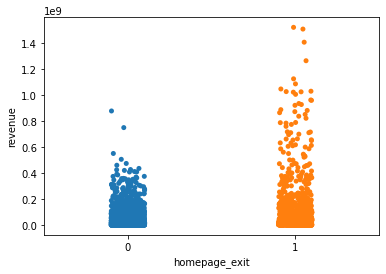

In [62]:
sns.stripplot(train.homepage_exit, train.revenue)

In [63]:
## imdb_id

In [64]:
train.imdb_id

0       tt2637294
1       tt0368933
2       tt2582802
3       tt1821480
4       tt1380152
          ...    
2995    tt0109403
2996    tt2364975
2997    tt0116908
2998    tt0343135
2999    tt1600195
Name: imdb_id, Length: 3000, dtype: object

In [65]:
train.imdb_id.value_counts()

tt1130080    1
tt0270288    1
tt0112346    1
tt3896198    1
tt1707386    1
            ..
tt0059800    1
tt0308363    1
tt4901756    1
tt1392197    1
tt0816442    1
Name: imdb_id, Length: 3000, dtype: int64

In [66]:
train.drop('imdb_id', axis=1, inplace=True)

In [67]:
test.drop('imdb_id', axis=1, inplace=True)

In [68]:
## original_language

In [69]:
train.original_language.isnull().sum()

0

In [70]:
train.original_language.value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
da       5
fa       5
ro       4
hu       3
tr       3
te       2
no       2
ml       2
fi       2
pl       2
sr       1
mr       1
nb       1
vi       1
he       1
ur       1
ar       1
id       1
el       1
cs       1
bn       1
Name: original_language, dtype: int64

In [71]:
lang_english=[]

for i in train.original_language:
    if str(i)=='en':
        lang_english.append(1)
    else:
        lang_english.append(0)
        

In [72]:
train['lang_english']=lang_english

In [73]:
lang_english=[]

for i in test.original_language:
    if str(i)=='en':
        lang_english.append(1)
    else:
        lang_english.append(0)
        
        
test['lang_english']=lang_english

In [74]:
train.drop('original_language', axis=1, inplace=True)

In [75]:
test.drop('original_language', axis=1, inplace=True)

In [76]:
train.head(1)

,budget,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit,lang_english
0,14000000,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0,0,1


In [77]:
# sns.barplot(train.lang_english, train.revenue, data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang_english', ylabel='revenue'>

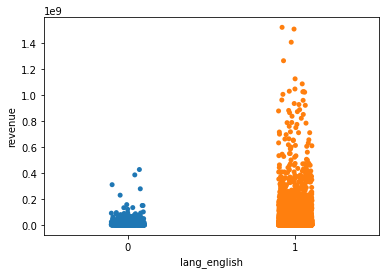

In [78]:
sns.stripplot(train.lang_english, train.revenue, data=train)

In [79]:
### original_title

In [80]:
train.original_title.isnull().sum()

0

In [81]:
train.original_title.value_counts()

King Kong                                   2
Sahara                                      2
The Double                                  2
Casino Royale                               2
Unknown                                     2
                                           ..
49 Up                                       1
Turbulence                                  1
The Trouble with Harry                      1
Homeward Bound II: Lost in San Francisco    1
Don't Think Twice                           1
Name: original_title, Length: 2975, dtype: int64

In [82]:
train.drop(['original_title'], axis=1, inplace=True)

In [83]:
test.drop(['original_title'], axis=1, inplace=True)

In [84]:
train.head(2)

,budget,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit,lang_english
0,14000000,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0,0,1
1,40000000,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,0,0,0,0,0,0,0,0,0,1


In [85]:
## overview

In [86]:
train.drop('overview', axis=1, inplace=True)

In [87]:
test.drop('overview', axis=1, inplace=True)

In [88]:
## popularity

In [89]:
train.popularity.isnull().sum()

0

In [90]:
train.popularity.value_counts()

0.318437     2
5.145185     1
13.300519    1
6.411782     1
39.186819    1
            ..
11.387338    1
16.628427    1
12.280827    1
14.811958    1
10.460298    1
Name: popularity, Length: 2999, dtype: int64

In [91]:
train.popularity.corr(train.revenue)

0.4614602896736129

In [92]:
## it can help in reveneue upto some extent

In [93]:
## poster_path

In [94]:
train.poster_path

0       /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1       /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2       /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3       /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4       /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
                      ...               
2995    /j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg
2996    /sS01LSy6KDrCZAhtkO18UdnWFT1.jpg
2997    /4MENR8x6mYqnZvp2hGjSaPJz64J.jpg
2998    /nIY4kvJTTnxoBR0wycrXng5MOYs.jpg
2999    /cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg
Name: poster_path, Length: 3000, dtype: object

In [95]:
train.poster_path.value_counts()

/lHxczIhjEXFuxUyLf5ktdwoIdZq.jpg    1
/vD5plFV1ec9CSIsdlPe9icCDRTL.jpg    1
/l8RKDgjl9co0IgFZblxhtIOi5Uj.jpg    1
/yGuQ2lz41EgjbnPeimXR9klTOoq.jpg    1
/u7Gei2Hvh0ux4weJRDZsgMoXSTI.jpg    1
                                   ..
/rhIRbceoE9lR4veEXuwCC2wARtG.jpg    1
/oP0ZWr6MsaQ1TV7xvnZJMKSfz0H.jpg    1
/7O3IkeHvp1sq5yMN0O8FsTee1C0.jpg    1
/qeYmisWa9CHT2GRv9dr5gJ3J9rP.jpg    1
/7w3JmmyL8GpBvW6BusQfQCSm2h0.jpg    1
Name: poster_path, Length: 2999, dtype: int64

In [96]:
train.drop('poster_path', axis=1, inplace=True)

In [97]:
test.drop('poster_path', axis=1, inplace=True)

In [98]:
## production_companies

In [99]:
train.drop('production_companies', axis=1, inplace=True)

In [100]:
test.drop('production_companies', axis=1, inplace=True)

In [101]:
## production_countries

In [102]:
train.production_countries.value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                                                            1752
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                             118
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                                                        94
[{'iso_3166_1': 'IN', 'name': 'India'}]                                                                                                                                                 69
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                                                51
                                                                 

In [103]:
production_country_usa=[]

for i in train.production_countries:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)
            

In [104]:
train['production_country_usa']=production_country_usa

In [105]:
production_country_usa=[]

for i in test.production_countries:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)
        
        
test['production_country_usa']=production_country_usa

In [106]:
train.drop('production_countries', axis=1, inplace=True)

In [107]:
test.drop('production_countries', axis=1, inplace=True)

In [108]:
train.head(2)

,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit,lang_english,production_country_usa
0,14000000,6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0,0,1,1
1,40000000,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,0,0,0,0,0,0,0,0,0,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='production_country_usa', ylabel='revenue'>

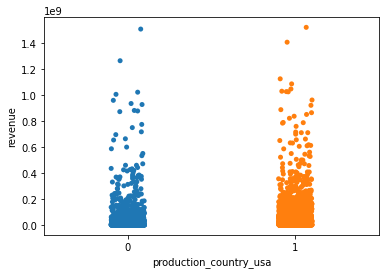

In [109]:
sns.stripplot(train.production_country_usa, train.revenue)

In [110]:
## release_date

In [111]:
train.release_date.isnull().sum()

0

In [112]:
train.release_date

0        2/20/15
1         8/6/04
2       10/10/14
3         3/9/12
4         2/5/09
          ...   
2995     4/22/94
2996     3/28/13
2997    10/11/96
2998     1/16/04
2999     9/22/11
Name: release_date, Length: 3000, dtype: object

In [113]:
mm, dd, yy = train.release_date[0].split('/')

In [114]:
mm,dd,yy

('2', '20', '15')

In [115]:
x=train.release_date.str.split('/')

In [116]:
x[0]

['2', '20', '15']

In [117]:
release_dd=[]
release_mm=[]
release_yyyy=[]

In [118]:
for i in train.release_date:
#     print(type(i.split('/')[0]))

    year=i.split('/')[2]
    
    if int(year) <= 19:
        year= '20'+year
    else:
        year='19'+year
        
        
    release_mm.append(int(i.split('/')[0]))
    release_dd.append(int(i.split('/')[1]))
    release_yyyy.append(int(year))

In [119]:
train['release_dd']=release_dd
train['release_mm']=release_mm
train['release_yyyy']=release_yyyy

In [120]:
release_dd=[]
release_mm=[]
release_yyyy=[]


for i in test.release_date:
    
    if str(i)!='nan':
        year=i.split('/')[2]
        if int(year) <= 19:
            year= '20'+year
        else:
            year='19'+year
        
        release_mm.append(int(i.split('/')[0]))
        release_dd.append(int(i.split('/')[1]))
        release_yyyy.append(int(year))
    else:
        release_mm.append(1)
        release_dd.append(1)
        release_yyyy.append(2000)
                          
test['release_dd']=release_dd
test['release_mm']=release_mm
test['release_yyyy']=release_yyyy

In [121]:
train.drop('release_date', axis=1, inplace=True)

In [122]:
test.drop('release_date', axis=1, inplace=True)

In [123]:
train.head(2)

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit,lang_english,production_country_usa,release_dd,release_mm,release_yyyy
0,14000000,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0,0,1,1,20,2,2015
1,40000000,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,0,0,0,0,0,0,0,0,0,1,1,6,8,2004


<AxesSubplot:xlabel='release_dd', ylabel='revenue'>

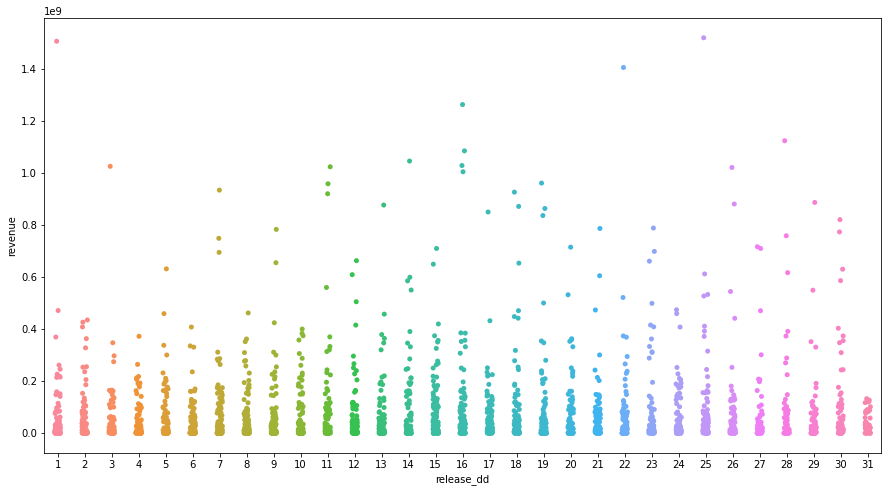

In [124]:
plt.figure(figsize = (15,8))
sns.stripplot(x=train.release_dd, y=train.revenue, data=train)

<AxesSubplot:xlabel='release_mm', ylabel='revenue'>

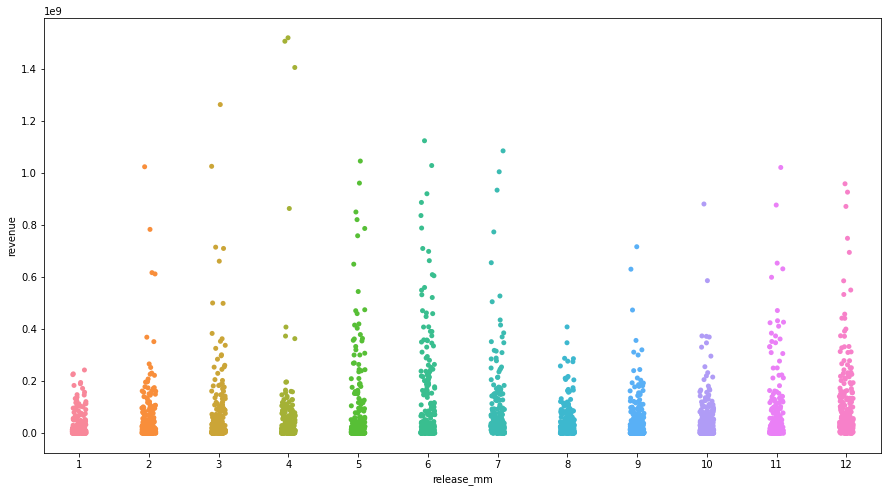

In [125]:
plt.figure(figsize = (15,8))
sns.stripplot(x=train.release_mm, y=train.revenue, data=train)

In [126]:
train.release_yyyy.value_counts()

2013    141
2015    128
2010    126
2016    125
2012    125
       ... 
1926      1
1952      1
1938      1
1930      1
1921      1
Name: release_yyyy, Length: 90, dtype: int64

<AxesSubplot:xlabel='release_yyyy', ylabel='revenue'>

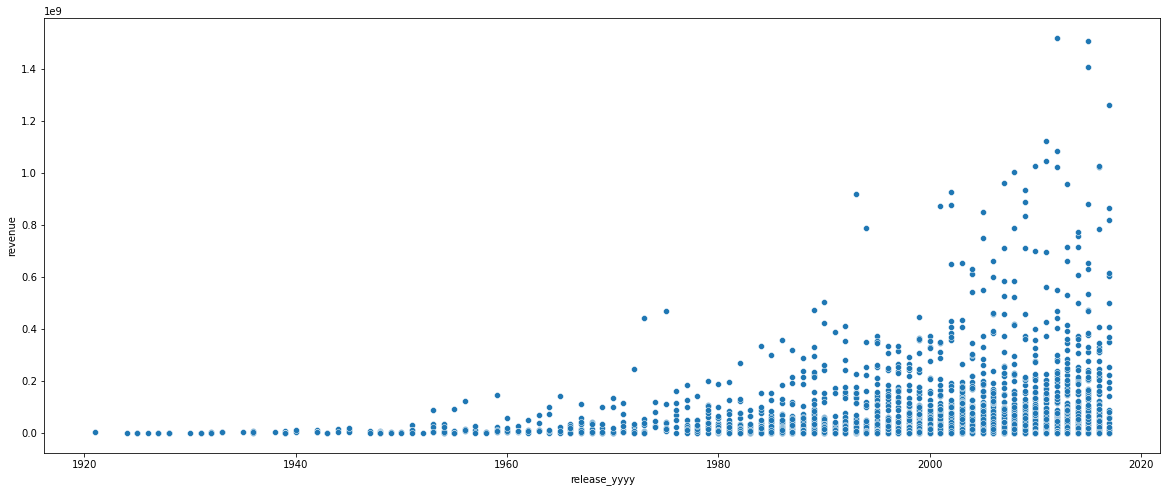

In [127]:
plt.figure(figsize = (20,8))
sns.scatterplot(x=train.release_yyyy, y=train.revenue, data=train)

In [128]:
## runtime

In [129]:
train.runtime.isnull().sum()

2

In [130]:
train.runtime.corr(train.revenue)

0.21638013018147212

In [131]:
train.runtime.value_counts()

90.0     100
100.0     99
105.0     91
95.0      89
98.0      85
        ... 
199.0      1
11.0       1
187.0      1
60.0       1
63.0       1
Name: runtime, Length: 139, dtype: int64

In [132]:
train.runtime=train.runtime.fillna(train.runtime.mean())

In [133]:
test.runtime=test.runtime.fillna(test.runtime.mean())

In [134]:
train.runtime.isnull().sum()

0

In [135]:
## spoken_languages

In [136]:
train.spoken_languages.isnull().sum()

20

In [137]:
train.spoken_languages

0                [{'iso_639_1': 'en', 'name': 'English'}]
1                [{'iso_639_1': 'en', 'name': 'English'}]
2                [{'iso_639_1': 'en', 'name': 'English'}]
3       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4                [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
                              ...                        
2995             [{'iso_639_1': 'en', 'name': 'English'}]
2996             [{'iso_639_1': 'sv', 'name': 'svenska'}]
2997             [{'iso_639_1': 'en', 'name': 'English'}]
2998             [{'iso_639_1': 'en', 'name': 'English'}]
2999             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 3000, dtype: object

In [138]:
spoken_lang_en=[]

for i in train.spoken_languages:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'English' in (d[0]['name']):
            spoken_lang_en.append(1)
        else:
            spoken_lang_en.append(0)
    else:
        spoken_lang_en.append(0)

In [139]:
train['spoken_lang_en']=spoken_lang_en

In [140]:
spoken_lang_en=[]

for i in test.spoken_languages:
    d=get_dict(i)
    if d!={}:
#         print(d)
#         print(d[0]['name'])
        if 'English' in (d[0]['name']):
            spoken_lang_en.append(1)
        else:
            spoken_lang_en.append(0)
    else:
        spoken_lang_en.append(0)
        

        
test['spoken_lang_en']=spoken_lang_en

In [141]:
train.drop('spoken_languages', axis=1, inplace=True)

In [142]:
test.drop('spoken_languages', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spoken_lang_en', ylabel='revenue'>

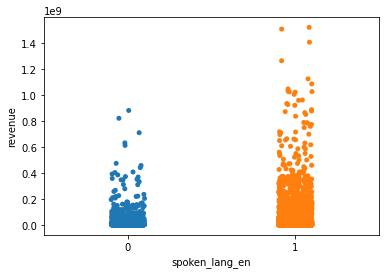

In [143]:
sns.stripplot(train.spoken_lang_en, train.revenue, data=train)

In [144]:
## status

In [145]:
train.status.isnull().sum()

0

In [146]:
test.status.isnull().sum()

2

In [147]:
train.status.value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [148]:
test.status.value_counts(dropna=False)

Released           4389
Post Production       5
NaN                   2
Rumored               2
Name: status, dtype: int64

In [149]:
status_dict={'Rumored':0, 'Released':1}
train['released_status']=train.status.map(status_dict)

In [150]:
status_dict={'Rumored':0, 'Released':1,'NaN':1, 'Post Production':1}
test['released_status']=test.status.map(status_dict)

In [151]:
train.drop('status', axis=1, inplace=True)

In [152]:
test.drop('status', axis=1, inplace=True)

In [153]:
train.head(2)

,budget,popularity,runtime,tagline,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit,lang_english,production_country_usa,release_dd,release_mm,release_yyyy,spoken_lang_en,released_status
0,14000000,6.575393,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0,0,1,1,20,2,2015,1,1
1,40000000,8.248895,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,0,0,0,0,0,0,0,0,0,1,1,6,8,2004,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='released_status', ylabel='revenue'>

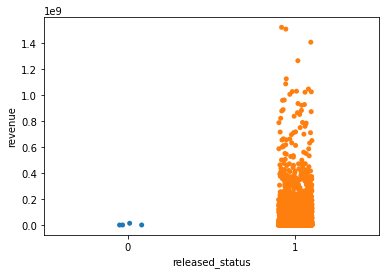

In [154]:
sns.stripplot(train.released_status, train.revenue, data=train)

In [155]:
## tagline

In [156]:
train.tagline.isnull().sum()

597

In [157]:
train.tagline

0       The Laws of Space and Time are About to be Vio...
1       It can take a lifetime to find true love; she'...
2         The road to greatness can take you to the edge.
3                                                     NaN
4                                                     NaN
                              ...                        
2995    It was supposed to be a routine prisoner trans...
2996                                                  NaN
2997                 What's forgotten is not always gone.
2998    For the most cautious man on Earth, life is ab...
2999            They stole his life. He's taking it back.
Name: tagline, Length: 3000, dtype: object

In [158]:
train.drop('tagline', axis=1, inplace=True)

In [159]:
test.drop('tagline', axis=1, inplace=True)

In [160]:
train.head(2)

,budget,popularity,runtime,title,Keywords,cast,crew,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit,lang_english,production_country_usa,release_dd,release_mm,release_yyyy,spoken_lang_en,released_status
0,14000000,6.575393,93.0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,0,1,0,0,0,0,0,0,0,0,0,1,1,20,2,2015,1,1
1,40000000,8.248895,113.0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,0,1,0,0,0,0,0,0,0,0,0,1,1,6,8,2004,1,1


In [161]:
## title

In [162]:
train.title

0                         Hot Tub Time Machine 2
1       The Princess Diaries 2: Royal Engagement
2                                       Whiplash
3                                        Kahaani
4                                     Marine Boy
                          ...                   
2995                                     Chasers
2996                            We Are the Best!
2997                     The Long Kiss Goodnight
2998                            Along Came Polly
2999                                   Abduction
Name: title, Length: 3000, dtype: object

In [163]:
train.drop('title', axis=1, inplace=True)

In [164]:
test.drop('title', axis=1, inplace=True)

In [165]:
## Keywords

In [166]:
train.Keywords.isnull().sum()

276

In [167]:
train.Keywords[0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

In [168]:
train.drop('Keywords', axis=1, inplace=True)

In [169]:
test.drop('Keywords', axis=1, inplace=True)

In [170]:
## cast

In [171]:
train.drop('cast', axis=1, inplace=True)

In [172]:
test.drop('cast', axis=1, inplace=True)

In [173]:
## crew

In [174]:
train.drop('crew', axis=1, inplace=True)

In [175]:
test.drop('crew', axis=1, inplace=True)

In [176]:
train.head()

,budget,popularity,runtime,revenue,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Animation,Documentary,Fantasy,homepage_exit,lang_english,production_country_usa,release_dd,release_mm,release_yyyy,spoken_lang_en,released_status
0,14000000,6.575393,93.0,12314651,0,1,0,0,0,0,0,0,0,0,0,1,1,20,2,2015,1,1
1,40000000,8.248895,113.0,95149435,0,1,0,0,0,0,0,0,0,0,0,1,1,6,8,2004,1,1
2,3300000,64.299990,105.0,13092000,1,0,0,0,0,0,0,0,0,0,1,1,1,10,10,2014,1,1
3,1200000,3.174936,122.0,16000000,0,0,0,0,0,0,1,0,0,0,1,0,0,9,3,2012,1,1
4,0,1.148070,118.0,3923970,0,0,1,0,0,0,0,0,0,0,0,0,0,5,2,2009,0,1


In [177]:
train.isnull().sum()

budget                    0
popularity                0
runtime                   0
revenue                   0
Drama                     0
Comedy                    0
Action                    0
Adventure                 0
Horror                    0
Crime                     0
Thriller                  0
Animation                 0
Documentary               0
Fantasy                   0
homepage_exit             0
lang_english              0
production_country_usa    0
release_dd                0
release_mm                0
release_yyyy              0
spoken_lang_en            0
released_status           0
dtype: int64

In [178]:
test.head()

,budget,popularity,runtime,Drama,Comedy,Action,Adventure,Horror,Crime,Thriller,Documentary,Fantasy,Animation,homepage_exit,lang_english,production_country_usa,release_dd,release_mm,release_yyyy,spoken_lang_en,released_status
0,0,3.851534,90.0,0,0,0,1,0,0,0,0,0,0,1,0,0,14,7,2007,1,1.0
1,88000,3.559789,65.0,0,0,0,0,1,0,0,0,0,0,0,1,1,19,5,1958,1,1.0
2,0,8.085194,100.0,0,1,0,0,0,0,0,0,0,0,0,1,1,23,5,1997,1,1.0
3,6800000,8.596012,130.0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,9,2010,0,1.0
4,2000000,3.217680,92.0,0,0,0,0,0,0,0,0,0,0,0,1,1,11,2,2005,1,1.0


In [179]:
test.isnull().sum()

budget                    0
popularity                0
runtime                   0
Drama                     0
Comedy                    0
Action                    0
Adventure                 0
Horror                    0
Crime                     0
Thriller                  0
Documentary               0
Fantasy                   0
Animation                 0
homepage_exit             0
lang_english              0
production_country_usa    0
release_dd                0
release_mm                0
release_yyyy              0
spoken_lang_en            0
released_status           2
dtype: int64

In [180]:
test.released_status.value_counts(dropna=False)

1.0    4394
0.0       2
NaN       2
Name: released_status, dtype: int64

In [181]:
test.released_status=test.released_status.fillna(1)

In [182]:
test.isnull().sum()

budget                    0
popularity                0
runtime                   0
Drama                     0
Comedy                    0
Action                    0
Adventure                 0
Horror                    0
Crime                     0
Thriller                  0
Documentary               0
Fantasy                   0
Animation                 0
homepage_exit             0
lang_english              0
production_country_usa    0
release_dd                0
release_mm                0
release_yyyy              0
spoken_lang_en            0
released_status           0
dtype: int64

In [183]:
dd

'20'

In [184]:
X=train.drop('revenue', axis=1)

In [185]:
X.isnull().sum().sum()

0

In [186]:
y=train.revenue

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
X_train.shape

(2400, 21)

In [189]:
## function to get the Root Mean Squared Logarithmic Error (RMSLE)

def get_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error( np.expm1(y_true), y_pred ))

In [195]:
import statsmodels.api as sm

model=sm.OLS(y,X)

result=model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                revenue   R-squared (uncentered):                   6.710
Model:                            OLS   Adj. R-squared (uncentered):              6.751
Method:                 Least Squares   F-statistic:                             -166.7
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        1.00
Time:                        08:56:20   Log-Likelihood:                         -58994.
No. Observations:                3000   AIC:                                  1.180e+05
Df Residuals:                    2979   BIC:                                  1.182e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [192]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

predict=lr.predict(X_test)
predict=np.expm1(predict)

get_score(y_test,predict)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [187]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X,y)

predict=lr.predict(test)

df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)

In [188]:
df

,id,revenue
0,3001,3.929499e+07
1,3002,1.311045e+07
2,3003,1.449945e+07
3,3004,4.044871e+07
4,3005,-4.591766e+06
...,...,...
4393,7394,9.343265e+07
4394,7395,2.991624e+07
4395,7396,4.980362e+07
4396,7397,3.791311e+07


In [189]:
## decision tree

In [190]:
from sklearn.tree import DecisionTreeRegressor

In [191]:
dc=DecisionTreeRegressor()

In [192]:
dc.fit(X,y)

DecisionTreeRegressor()

In [193]:
predict=dc.predict(test)

df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,3100000.0
1,3002,121.0
2,3003,25605015.0
3,3004,68929150.0
4,3005,113783.0
...,...,...
4393,7394,27610873.0
4394,7395,68729358.0
4395,7396,10903846.0
4396,7397,3317662.0


In [194]:
## hyperparameter tuning

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
clf=DecisionTreeRegressor()

In [197]:
paremeter={'criterion':['mse','mae'],
    'max_depth':[2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8],
    'max_features':['auto','sqrt','log2'],
    }

In [198]:
model_grid=GridSearchCV(clf,paremeter,cv=5)

In [199]:
# model_grid.fit(X,y)

In [200]:
# model_grid.best_estimator_

In [201]:
# model_grid.best_params_

In [202]:
dc2=DecisionTreeRegressor(max_depth=5, min_samples_split=8)

In [203]:
dc2.fit(X,y)


predict=dc2.predict(test)

df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,6.074563e+06
1,3002,6.074563e+06
2,3003,2.109322e+07
3,3004,2.109322e+07
4,3005,6.074563e+06
...,...,...
4393,7394,1.118282e+08
4394,7395,4.391938e+07
4395,7396,4.391938e+07
4396,7397,4.279671e+07


In [204]:
## random forest

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
model=RandomForestRegressor()

In [207]:
 model.fit(X,y)

RandomForestRegressor()

In [208]:
predict=model.predict(test)

df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,3.274718e+06
1,3002,6.317399e+06
2,3003,1.355891e+07
3,3004,2.564263e+07
4,3005,2.428745e+06
...,...,...
4393,7394,1.210199e+08
4394,7395,3.187737e+07
4395,7396,6.872227e+07
4396,7397,1.114631e+08


In [209]:
## random forest tuning

In [210]:
clf2=RandomForestRegressor()

In [211]:
parameter= {'n_estimators':[50,100,150,200],
    'max_depth':[2,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10]
          }

In [212]:
rdf_grid=GridSearchCV(clf2,parameter,cv=5)

In [213]:
# rdf_grid.fit(X,y)

In [214]:
# rdf_grid.best_estimator_

In [215]:
model=RandomForestRegressor(n_estimators=50, max_depth=10,min_samples_split=7, random_state=0)

In [216]:
model.fit(X,y)

RandomForestRegressor(max_depth=10, min_samples_split=7, n_estimators=50,
                      random_state=0)

In [217]:
predict=model.predict(test)



In [218]:
## xgboost

In [219]:
from xgboost import XGBRegressor

In [220]:
xgb=XGBRegressor()

In [221]:
X1 = X.values

In [222]:
xgb.fit(X1,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [223]:
predict=xgb.predict(test.values)

In [224]:


df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,1.568499e+07
1,3002,5.455442e+06
2,3003,1.478998e+07
3,3004,1.789736e+07
4,3005,2.733901e+06
...,...,...
4393,7394,1.013628e+08
4394,7395,2.625496e+07
4395,7396,5.135964e+07
4396,7397,1.586184e+08


In [225]:
from lightgbm import LGBMRegressor

In [226]:
lgb=LGBMRegressor()

In [227]:
lgb.fit(X,y)

LGBMRegressor()

In [228]:
predict=lgb.predict(test)

In [229]:

df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,1.083434e+07
1,3002,6.701213e+06
2,3003,2.150456e+07
3,3004,1.922771e+07
4,3005,6.285347e+06
...,...,...
4393,7394,9.148284e+07
4394,7395,3.387808e+07
4395,7396,6.221273e+07
4396,7397,7.220048e+07


In [197]:
1e-100 == 0.0

False

In [201]:
1e-100 + 1.0 == 1.0

True

In [202]:
np.log(1e-100 + 1.0)

0.0

In [205]:
np.log1p(1e-100)

1e-100